<a href="https://colab.research.google.com/github/Ke-Pa-Sa/ProjectML_phase_detection/blob/main/ProjectML_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import TensorDataset, random_split, DataLoader

In [5]:
file_path = "/spins_data_L64_modelIsing_N10_nT101_minT0.8_maxT3.8_1.csv"

df = pd.read_csv(file_path)
print(df['Temperature'])

0       0.8
1       0.8
2       0.8
3       0.8
4       0.8
       ... 
1005    3.8
1006    3.8
1007    3.8
1008    3.8
1009    3.8
Name: Temperature, Length: 1010, dtype: float64


In [7]:
file_path_t = "/spins_data_L64_modelIsing_N30_nT61_minT1.5_maxT3.5_1.csv"

df_t = pd.read_csv(file_path_t)

print(df_t['Temperature'])

0       1.5
1       1.5
2       1.5
3       1.5
4       1.5
       ... 
1825    3.5
1826    3.5
1827    3.5
1828    3.5
1829    3.5
Name: Temperature, Length: 1830, dtype: float64


In [8]:
# Regular expression pattern to match the parts of the filename
# The (?P<extra>\d+)? part makes the extra digits optional
pattern = r"spins_data_L(?P<L>\d+)_model(?P<model>\w+)_N(?P<N>\d+)_nT(?P<nT>\d+)"

# Search for the pattern in the filename
match = re.search(pattern, filename)

match_t = re.search(pattern, filename_t)

# Extract the values if the pattern was found
if match:
    L = int(match.group('L'))
    model = match.group('model')
    N = int(match.group('N'))
    nT = int(match.group('nT'))
    print(f"L: {L}, model: {model}, N: {N}, nT: {nT}")
else:
    print("Pattern not found in the filename.")

if match_t:
    L_t = int(match_t.group('L'))
    model_t = match_t.group('model')
    N_t = int(match_t.group('N'))
    nT_t = int(match_t.group('nT'))
    print(f"L_t: {L_t}, model_t: {model_t}, N_t: {N_t}, nT_t: {nT_t}")
else:
    print("Pattern not found in the filename.")


L: 64, model: Ising, N: 10, nT: 101
L_t: 64, model_t: Ising, N_t: 30, nT_t: 61


In [9]:
df['Spins'] = df['Spins'].apply(lambda x: np.reshape(list(map(float, x.split(' '))), (L,L)))
df_t['Spins'] = df_t['Spins'].apply(lambda x: np.reshape(list(map(float, x.split(' '))), (L,L)))


In [10]:
print(df['Spins'])
print(df_t['Spins'])

0       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
1       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
2       [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
3       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
4       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
                              ...                        
1005    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0...
1006    [[1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0,...
1007    [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0...
1008    [[1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -...
1009    [[1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0,...
Name: Spins, Length: 1010, dtype: object
0       [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
1       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
2       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
3       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1....
4       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
                              .

In [ ]:
fig, axes = plt.subplots(nT, N, figsize=(int(N*5), int(nT*5)))



for i, spin in enumerate(df['Spins']):
    # Convert the spins string back to a list of integers
    #spin_list = list(map(float, spin.split(' ')))

    #df.loc[i, "Spins_float"] = spin_list
    #print(spin.shape)
    # Reshape the spins list into a LxL grid
    spin_config = np.reshape(spin, (L, L))

    axes[i//N,i%N].imshow(spin_config, cmap='coolwarm', interpolation='nearest')
    T = df["Temperature"][i]
    axes[i//N,i%N].set_title(f"Temperature {T}")
    axes[i//N,i%N].axis('off') # Optionally, hide the axis


In [ ]:
fig, axes = plt.subplots(nT_t, N_t, figsize=(int(N_t*5), int(nT_t*5)))



for i, spin in enumerate(df_t['Spins']):
    # Convert the spins string back to a list of integers
    #spin_list = list(map(float, spin.split(' ')))

    #df.loc[i, "Spins_float"] = spin_list
    #print(spin.shape)
    # Reshape the spins list into a LxL grid
    spin_config = np.reshape(spin, (L, L))

    axes[i//N,i%N].imshow(spin_config, cmap='coolwarm', interpolation='nearest')
    T = df["Temperature"][i]
    axes[i//N,i%N].set_title(f"Temperature {T}")
    axes[i//N,i%N].axis('off') # Optionally, hide the axis


In [11]:
x= 2.4
#print(df['Temperature'])
filtered_df = df[((df['Temperature'] > x-1.1) & (df['Temperature'] < x-0.3)) | ((df['Temperature'] > x+0.3) & (df['Temperature'] < x+1.1))]
print(filtered_df["Temperature"])

X = torch.tensor(filtered_df['Temperature'].values, dtype=torch.float)
y = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in filtered_df['Spins'].values]).unsqueeze(1)
dataset = TensorDataset(X, y)

X_t = torch.tensor(df_t['Temperature'].values, dtype=torch.float)
y_t = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in df_t['Spins'].values]).unsqueeze(1)
dataset_t = TensorDataset(X_t, y_t)

170    1.31
171    1.31
172    1.31
173    1.31
174    1.31
       ... 
895    3.47
896    3.47
897    3.47
898    3.47
899    3.47
Name: Temperature, Length: 530, dtype: float64


In [12]:
train_ratio = 0.8 # 80% for training, 20% for testing

# Calculate the number of samples for training and testing
num_samples = len(dataset)
num_train = int(train_ratio * num_samples)
num_test = num_samples - num_train

print(num_train, num_test)

# Split the dataset
torch.manual_seed(42)
train_dataset, test_dataset = random_split(dataset, [num_train, num_test])

424 106


In [13]:
print(dataset[3][1].shape)
# channel, dimentions

torch.Size([1, 64, 64])


In [14]:
print(len(train_dataset), len(test_dataset))

424 106


In [15]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary



In [16]:
# PyTorch models inherit from torch.nn.Module
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.forward1 = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Dropout(0.3),
            nn.Conv2d(4, 16, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Dropout(0.3),
            nn.Conv2d(16, 32, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Dropout(0.3),
            nn.Conv2d(32, 64, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Flatten(),
            nn.Linear(64*4*4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16,1)
        )

    def forward(self, x):
        x = self.forward1(x)
        return x

# PyTorch models inherit from torch.nn.Module
class NN_1(nn.Module):
    def __init__(self):
        super(NN_1, self).__init__()
        self.forward1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(L**2, 16000),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16000, 4000),
            nn.ReLU(),
            nn.Linear(4000, 2000),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(2000, 1000),
            nn.ReLU(),
            nn.Linear(1000,200),
            nn.Dropout(0.5),
            nn.Linear(200, 20),
            nn.ReLU(),
            nn.Linear(20,1)
        )

    def forward(self, x):
        x = self.forward1(x)
        return x


In [17]:
model = CNN_1()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.006, momentum=0.9, dampening=0.0, weight_decay=0, nesterov=False)

#torch.optim.Adam(model.parameters(), lr=0.01)
optim.SGD(model.parameters(), lr=0.005, momentum=0.9, dampening=0.0, weight_decay=0, nesterov=False)
#epoch 100
summary(model, input_size=(1, L, L))

#print(train_dataset[5])
batch_size = 8 # Example batch size
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
#print(trainloader[0][1].shape)
for batch_idx, (temperatures, spin_configs) in enumerate(trainloader):
    print(f"Batch {batch_idx}:")
    print(f"Temperatures shape: {temperatures.shape}")
    print(f"Spin Configurations shape: {spin_configs.shape}")
    break

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 64, 64]              40
              ReLU-2            [-1, 4, 64, 64]               0
         MaxPool2d-3            [-1, 4, 32, 32]               0
           Dropout-4            [-1, 4, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]             592
              ReLU-6           [-1, 16, 32, 32]               0
         MaxPool2d-7           [-1, 16, 16, 16]               0
           Dropout-8           [-1, 16, 16, 16]               0
            Conv2d-9           [-1, 32, 16, 16]           4,640
             ReLU-10           [-1, 32, 16, 16]               0
        MaxPool2d-11             [-1, 32, 8, 8]               0
          Dropout-12             [-1, 32, 8, 8]               0
           Conv2d-13             [-1, 64, 8, 8]          18,496
             ReLU-14             [-1, 6

Streaming output truncated to the last 5000 lines.
tensor(0.0325, grad_fn=<MeanBackward0>)
tensor(0.0455, grad_fn=<MseLossBackward0>)
tensor(0.0455, grad_fn=<MeanBackward0>)
tensor(0.0270, grad_fn=<MseLossBackward0>)
tensor(0.0270, grad_fn=<MeanBackward0>)
tensor(0.0432, grad_fn=<MseLossBackward0>)
tensor(0.0432, grad_fn=<MeanBackward0>)
tensor(0.0309, grad_fn=<MseLossBackward0>)
tensor(0.0309, grad_fn=<MeanBackward0>)
tensor(0.0236, grad_fn=<MseLossBackward0>)
tensor(0.0236, grad_fn=<MeanBackward0>)
tensor(0.0265, grad_fn=<MseLossBackward0>)
tensor(0.0265, grad_fn=<MeanBackward0>)
tensor(0.0130, grad_fn=<MseLossBackward0>)
tensor(0.0130, grad_fn=<MeanBackward0>)
tensor(0.0128, grad_fn=<MseLossBackward0>)
tensor(0.0128, grad_fn=<MeanBackward0>)
tensor(0.0095, grad_fn=<MseLossBackward0>)
tensor(0.0095, grad_fn=<MeanBackward0>)
tensor(0.0332, grad_fn=<MseLossBackward0>)
tensor(0.0332, grad_fn=<MeanBackward0>)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.0160, grad_fn=<MeanBackward

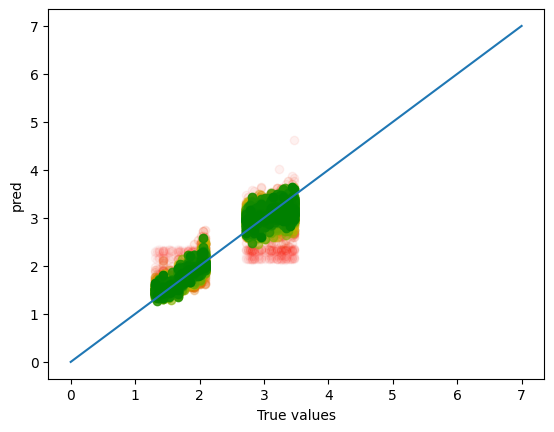

In [18]:
n_epochs = 100

y_pred_list = []
labels_list = []

fig, ax = plt.subplots()
ax.plot(np.linspace(0,7,1001),np.linspace(0,7,1001))
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),n_epochs))


for epoch in range(n_epochs):
    for labels, inputs in trainloader:
        # forward, backward, and then weight update
        #print(inputs.shape)
        #print(labels.shape)
        y_pred = model(inputs)
        loss = loss_fn(y_pred.squeeze(), labels)
        print(loss)
        print(torch.mean((y_pred.squeeze() - labels)**2))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    mse = 0
    count = 0
    for labels, inputs in testloader:
        y_pred = model(inputs)
        mse += torch.mean((y_pred.squeeze() - labels)**2)
        count += len(labels)
        y_pred_list.extend(y_pred.squeeze().tolist()) # Convert to list and add to y_pred_list
        labels_list.extend(labels.tolist()) # Convert to list and add to labels_list

    mse /= count
    print("Epoch %d: model mean square error %.2f" % (epoch, mse))

    ax.scatter(labels_list, y_pred_list, alpha = epoch/n_epochs, c=str(colors[epoch]))
    ax.set_xlabel('True values')
    ax.set_ylabel('pred')
    y_pred_list.clear()
    labels_list.clear()


In [25]:
testloader_t = DataLoader(dataset_t, batch_size=N_t, shuffle=False)

y_pred_list_t = []
labels_list_t = []
mse_t = []
std_t = []
count_t = 0
for labels, inputs in testloader_t:
        y_pred = model(inputs)
        print(labels, y_pred.squeeze())
        #print(torch.mean((y_pred.squeeze() - labels)**2).item())
        mse_t.append(torch.mean((y_pred.squeeze() - labels)**2).item())
        std_t.append(torch.std(y_pred.squeeze()).item())
        count += len(labels)
        y_pred_list_t.extend(y_pred.squeeze().tolist()) # Convert to list and add to y_pred_list
        labels_list_t.extend(labels.tolist()) # Convert to list and add to labels_list
print(mse_t)
print(std_t)
print(y_pred_list_t)
print(labels_list_t)


tensor([1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
        1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
        1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
        1.5000, 1.5000, 1.5000]) tensor([1.5290, 1.5281, 1.4906, 1.4806, 1.6265, 1.3652, 1.5556, 1.5790, 1.4661,
        1.4604, 1.5850, 1.4464, 1.4700, 1.5727, 1.5386, 1.4681, 1.4395, 1.5068,
        1.4089, 1.4827, 1.4640, 1.5326, 1.3770, 1.5026, 1.5343, 1.4329, 1.4275,
        1.5539, 1.3705, 1.4135], grad_fn=<SqueezeBackward0>)
tensor([1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333,
        1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333,
        1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333,
        1.5333, 1.5333, 1.5333]) tensor([1.5444, 1.5141, 2.0058, 1.4630, 1.5542, 1.5736, 1.3733, 1.5950, 1.7532,
        1.4515, 1.4412, 1.5448, 1.4392, 1.6313, 1.5558, 1.5844, 1.4116, 1

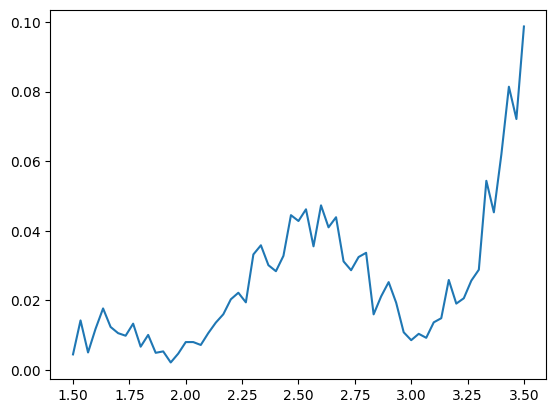

In [26]:
fig, ax = plt.subplots()
labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, mse_t)

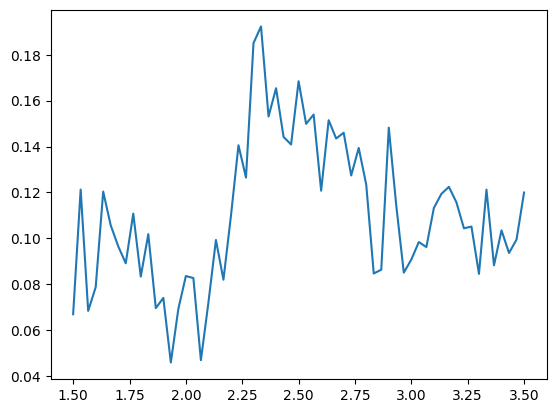

In [27]:
fig, ax = plt.subplots()
labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, std_t)

In [ ]:
x=1.5
y=3.1
print(df['Temperature'])
filtered_df = df[(df['Temperature'] < x) | (df['Temperature'] > y)]
print(filtered_df["Temperature"])

0       0.8
1       0.8
2       0.8
3       0.8
4       0.8
       ... 
1005    3.8
1006    3.8
1007    3.8
1008    3.8
1009    3.8
Name: Temperature, Length: 1010, dtype: float64
0       0.8
1       0.8
2       0.8
3       0.8
4       0.8
       ... 
1005    3.8
1006    3.8
1007    3.8
1008    3.8
1009    3.8
Name: Temperature, Length: 480, dtype: float64
